## Imports

In [114]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Settings

In [115]:
R = 255
G = 128
B = 64
height = 180
width = 320
mix_dir = '/home/drevital/obstacles_classification_datasets/test_mix'
mix_imname = 'test_mix_1.png'

## Utils

In [116]:
def display_image(im, title, gray_scale=False):
    if gray_scale:
        plt.imshow(im, cmap='gray', vmin=0, vmax=255)
    else:
        plt.imshow(im)
    plt.title(title)
    plt.show()

## Define Mixed Channels Augments

In [117]:
r, g, b = 0, 1, 2

augments = {0: [r, b, g],
            1: [g, r, b],
            2: [g, b, r],
            3: [b, r, g],
            4: [b, g, r]}

## Build/Read Source Image

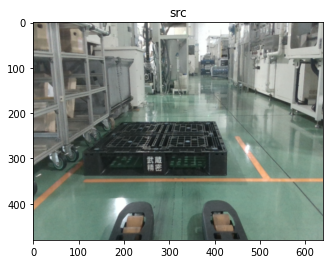

array([[126, 120, 107],
       [119, 115, 101],
       [120, 115, 103],
       [125, 119, 108],
       [127, 120, 109]], dtype=uint8)

In [118]:
impath = os.path.join(mix_dir, mix_imname)
src = cv2.imread(impath)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) 
height = src.shape[0]
width = src.shape[1]

plt.imshow(src)
plt.title('src')
plt.show()
src[0][:5]

## Build & Display Augmentations

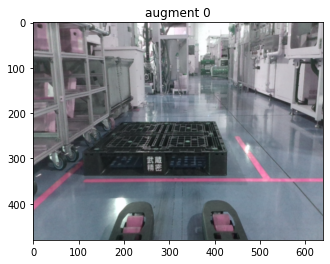

[[126 107 120]
 [119 101 115]
 [120 103 115]
 [125 108 119]
 [127 109 120]]


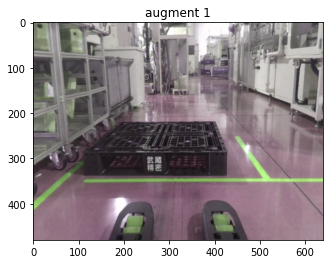

[[120 126 107]
 [115 119 101]
 [115 120 103]
 [119 125 108]
 [120 127 109]]


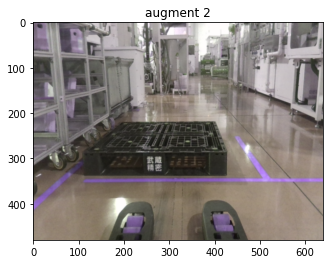

[[120 107 126]
 [115 101 119]
 [115 103 120]
 [119 108 125]
 [120 109 127]]


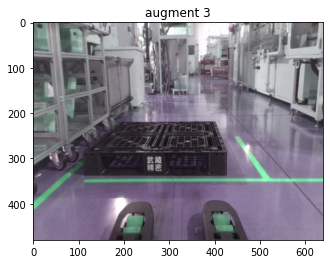

[[107 126 120]
 [101 119 115]
 [103 120 115]
 [108 125 119]
 [109 127 120]]


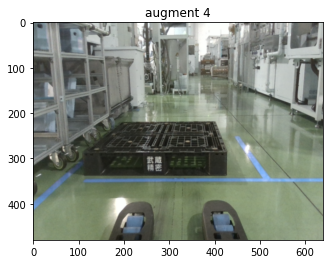

[[107 120 126]
 [101 115 119]
 [103 115 120]
 [108 119 125]
 [109 120 127]]


In [119]:
for a in range(5):
    aug = [[[src[i][j][augments[a][k]] for k in range(3)]
            for j in range(width)] for i in range(height)]
    aug = np.array(aug)
    plt.imshow(aug)
    plt.title(f'augment {a}')
    plt.show()
    print(aug[0][:5])

## Build & Display Augmentations - 2

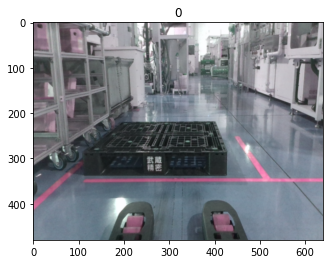

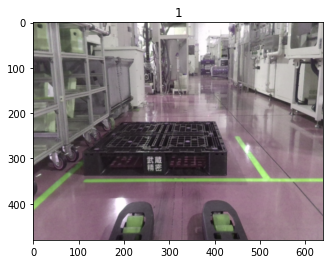

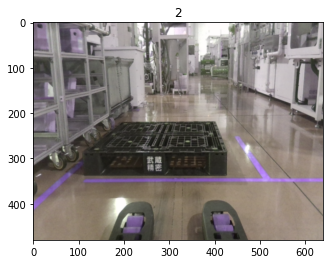

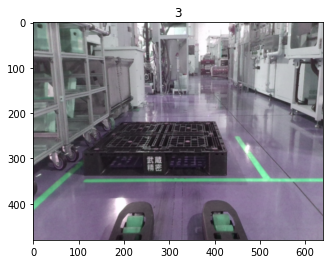

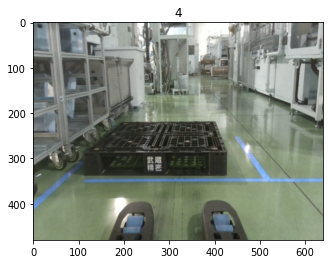

In [120]:
rgb = cv2.split(src)
for a in range(5):
    aug = cv2.merge([rgb[augments[a][0]], rgb[augments[a][1]], rgb[augments[a][2]]])
    display_image(aug, str(a))